# Transform

Transfom represent kinds of transform matrixes, including translation, scaling, rotation and projection.

## Identity

In [ ]:
from py3d import Transform
Transform()

In [ ]:
assert _.sum() == 4

In [ ]:
Transform(n=(2,))

In [ ]:
assert _.sum() == 8

## Translation

In [ ]:
from py3d import Vector3
Vector3([2,3,4]).as_translation()

In [ ]:
import numpy
assert numpy.array_equal(_[3,0:3],[2,3,4])

In [ ]:
Transform.from_translation(x=1,n=(2,))

Translate a series of points

In [ ]:
points=Vector3.Rand(10)@Transform.from_translation(x=1)

## Scaling

In [ ]:
from py3d import Vector3
Vector3(x=1,y=2,z=(1,2,3)).as_scaling()

In [ ]:
Transform.from_scaling(x=1,y=-1,z=(1,2,3))

## Orthographic projection

In [ ]:
from sympy import Matrix, symbols
l,r,t,b,n,f=symbols("l r t b n f")
m_scale = Matrix([
    [2/(r-l),0,0,0],
    [0,2/(t-b),0,0],
    [0,0,2/(n-f),0],
    [0,0,0,1]
])
m_translate = Matrix([
    [1,0,0,-(l+r)/2],
    [0,1,0,-(b+t)/2],
    [0,0,1,-(f+n)/2],
    [0,0,0,1]
])
m_scale*m_translate

## Perspective projection

In [ ]:
from py3d import Transform, pi, Vector3
projection=Transform.from_perspective(pi/2, 1.2, 0, 1000)
projection

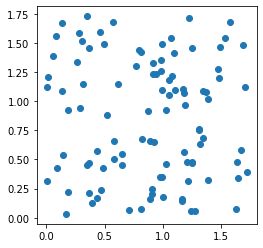

In [30]:
from py3d import Camera,pi,Vector3,Transform
import matplotlib.pyplot as plt
camera=Camera()
camera.transform.translation = Transform.from_translation([0,0,10])
camera.transform.rotation = Transform.from_rpy([0,0,0])
camera.projection = Transform.from_perspective(pi/3,1,1,1000)
points = Vector3.Rand(100)
proj = points @ camera.matrix
plt.gca().set_aspect(1)
plt.scatter(proj.x, proj.y)

In [ ]:
from py3d import Transform, Vector3
assert (Transform([
    [1., 0., 0.3, 0.],
    [0., 1., 0., 0.],
    [0., 0., 0.1, 0.],
    [-1., 0., 0., 1.]
]) == [
    [1., 0., 0.3, 0.],
    [0., 1., 0., 0.],
    [0., 0., 0.1, 0.],
    [-1., 0., 0., 1.]
]).all()
assert Transform(n=(2, 3)).shape == (2, 3, 4, 4)
assert Transform(n=(4, 5)).n == (4, 5)
assert ((Vector3(x=1).H @ Transform())[..., 0:3] == Vector3(x=1)).all()
assert (Vector3(x=1) @ Transform() == Vector3(x=1)).all()
p = Vector3([1, 2, 3])
T = Transform.from_translation([1, 2, 3])
R = Transform.from_euler("xyz", [0, 0, 1])
from numpy import allclose
assert allclose(p @ T @ R, p @ (T@R))
